# データで読み解く自然災害：脅威の変遷と人類の戦い

## プロローグ：数字の向こう側にある物語
「100年に一度の災害」
最近、ニュースでこの言葉を耳にする機会が増えたように感じませんか？

20世紀初頭から現在に至るまで、人類は数え切れないほどの自然災害に直面してきました。技術は進歩し、私たちの生活は豊かになりましたが、同時に気候変動という新たな課題も突きつけられています。

本レポートでは、EM-DAT（国際災害データベース）の100年以上にわたる記録を紐解き、以下の問いに対する答えを探ります。

1.  **災害は本当に増えているのか？**
2.  **どのような災害が私たちを脅かしているのか？**
3.  **私たちは災害に対して強くなっているのか？**

特に、私たちが暮らす**アジア**という地域に焦点を当てながら、データから見えてくる「真実」に迫ります。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# グラフのスタイル設定
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")
sns.set_palette("husl")

# データの読み込み
file_path = 'Week9/災害データ分析.csv'
try:
    df = pd.read_csv(file_path)
    print("データ読み込み完了：過去の災害記録へのアクセスに成功しました。")
    display(df.head())
except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません: {file_path}")

データ読み込み完了：過去の災害記録へのアクセスに成功しました。


,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## 第1章：増加する脅威の正体
まずは、過去100年間で自然災害の発生件数がどのように推移してきたのかを見てみましょう。
「昔はよかった」という感覚は正しいのでしょうか、それとも単なるノスタルジーなのでしょうか？

C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30330 (\N{CJK UNIFIED IDEOGRAPH-767A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.p

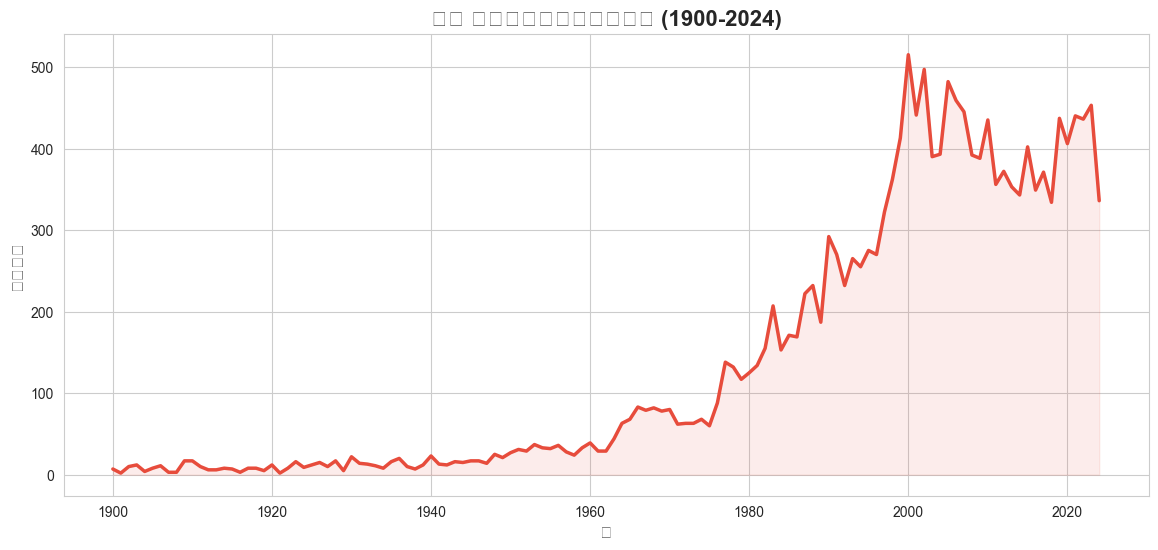

In [2]:
# 前処理：発生年(Start Year)の欠損除去と型変換
df = df.dropna(subset=['Start Year'])
df['Start Year'] = df['Start Year'].astype(int)
df = df[df['Start Year'] >= 1900] # 1900年以降を対象

# 年別発生件数の集計
disasters_per_year = df['Start Year'].value_counts().sort_index()

# 可視化
plt.figure(figsize=(14, 6))
sns.lineplot(x=disasters_per_year.index, y=disasters_per_year.values, linewidth=2.5, color='#e74c3c')
plt.title('年別 自然災害発生件数の推移 (1900-2024)', fontsize=16, fontweight='bold')
plt.xlabel('年', fontsize=12)
plt.ylabel('発生件数', fontsize=12)
plt.fill_between(disasters_per_year.index, disasters_per_year.values, color='#e74c3c', alpha=0.1)
plt.show()

### 📈 データからの洞察
グラフは右肩上がりの急激なカーブを描いています。特に1960年代以降の増加は顕著です。

- **記録のバイアス**: 昔の小規模な災害は記録に残っていない可能性があります。
- **気候変動の影響**: しかし、近年の高止まり傾向は、気候変動による異常気象の増加を示唆していると言えるでしょう。

私たちは今、かつてない頻度で災害が発生する時代を生きています。

## 第2章：敵を知る - 災害の種類と傾向
「災害」と一口に言っても、その種類は様々です。私たちを最も頻繁に襲う災害は何なのでしょうか？

C:\Users\han jihoon\AppData\Local\Temp\ipykernel_21484\2053985535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Disaster Subgroup', data=df, order=order, palette='viridis')
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30330 (\N{CJK UNIFIED IDEOGRAPH-767A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(

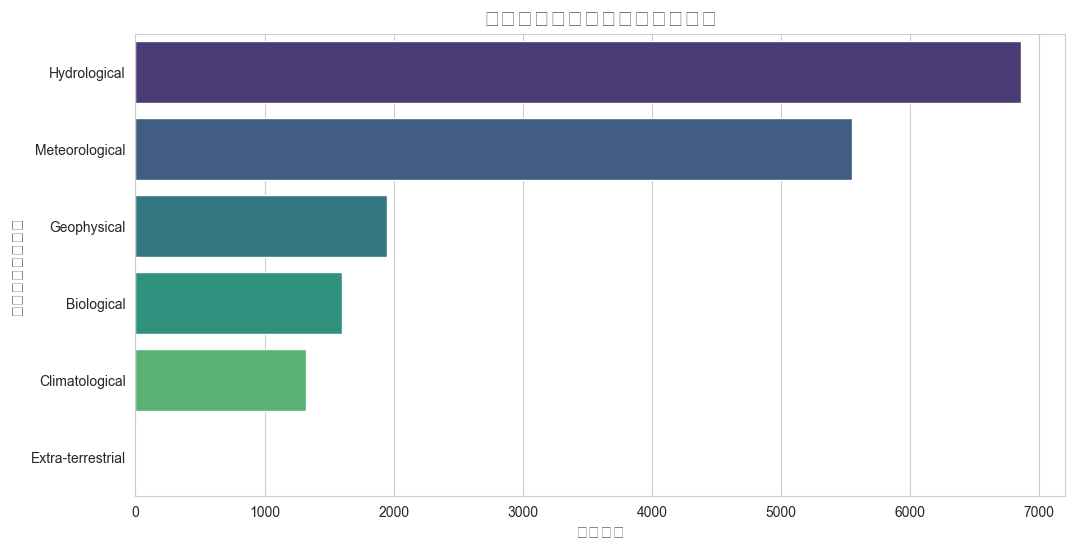

In [3]:
plt.figure(figsize=(12, 6))
order = df['Disaster Subgroup'].value_counts().index
sns.countplot(y='Disaster Subgroup', data=df, order=order, palette='viridis')
plt.title('災害サブグループ別の発生頻度', fontsize=16, fontweight='bold')
plt.xlabel('発生件数', fontsize=12)
plt.ylabel('災害サブグループ', fontsize=12)
plt.show()

### 🌊 水と嵐の脅威
圧倒的に多いのが **Hydrological（洪水など）** と **Meteorological（嵐など）** です。
これらは気候システムと密接に関わっており、地球温暖化の影響を最も受けやすいカテゴリーです。
一方で、**Geophysical（地震・火山）** は件数こそ少ないものの、突発的で予測が困難という特徴があります。

## 第3章：アジア - 世界の災害ホットスポット
世界地図を広げたとき、災害はどこに集中しているのでしょうか？

C:\Users\han jihoon\AppData\Local\Temp\ipykernel_21484\3801319179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Region', data=df, order=order_region, palette='coolwarm')
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30330 (\N{CJK UNIFIED IDEOGRAPH-767A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(byt

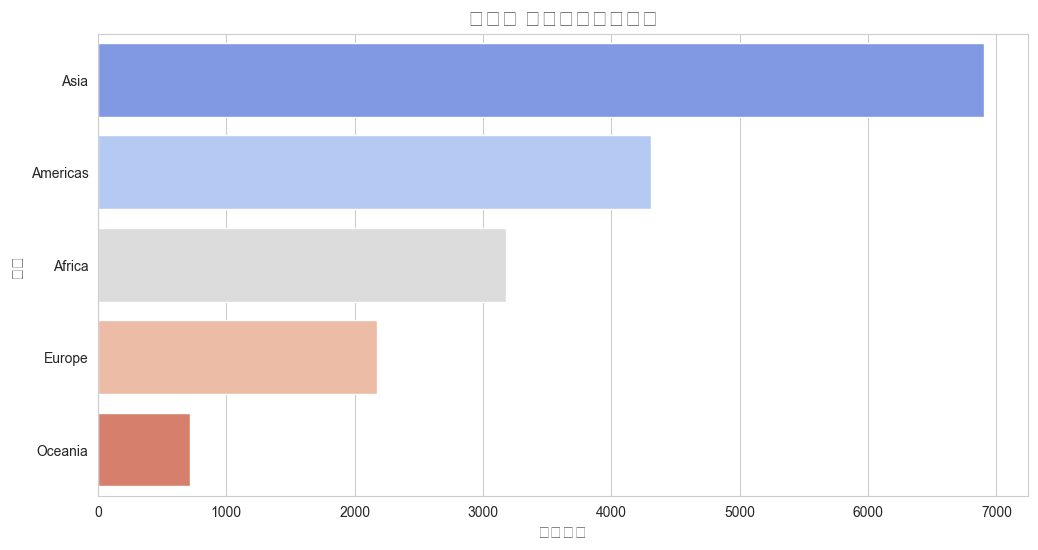

In [4]:
plt.figure(figsize=(12, 6))
order_region = df['Region'].value_counts().index
sns.countplot(y='Region', data=df, order=order_region, palette='coolwarm')
plt.title('地域別 自然災害発生件数', fontsize=16, fontweight='bold')
plt.xlabel('発生件数', fontsize=12)
plt.ylabel('地域', fontsize=12)
plt.show()

### 🌏 アジアの宿命
データは残酷な現実を突きつけます。**Asia（アジア）** の突出ぶりは一目瞭然です。
広大な面積、多くの人口、そして複雑な気象・地質条件。日本を含むこの地域は、まさに「災害の最前線」にあります。
このデータは、私たちアジアに住む人々にとって、防災が「他人事」ではなく「自分事」であることを強く訴えかけています。

## 第4章：私たちは強くなっているのか？（レジリエンスの検証）
災害の件数は増えています。では、被害の大きさはどうでしょうか？
「災害1件あたりの平均死者数」を計算することで、社会の防災力（レジリエンス）の変化を探ってみましょう。

C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\han jihoon\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.p

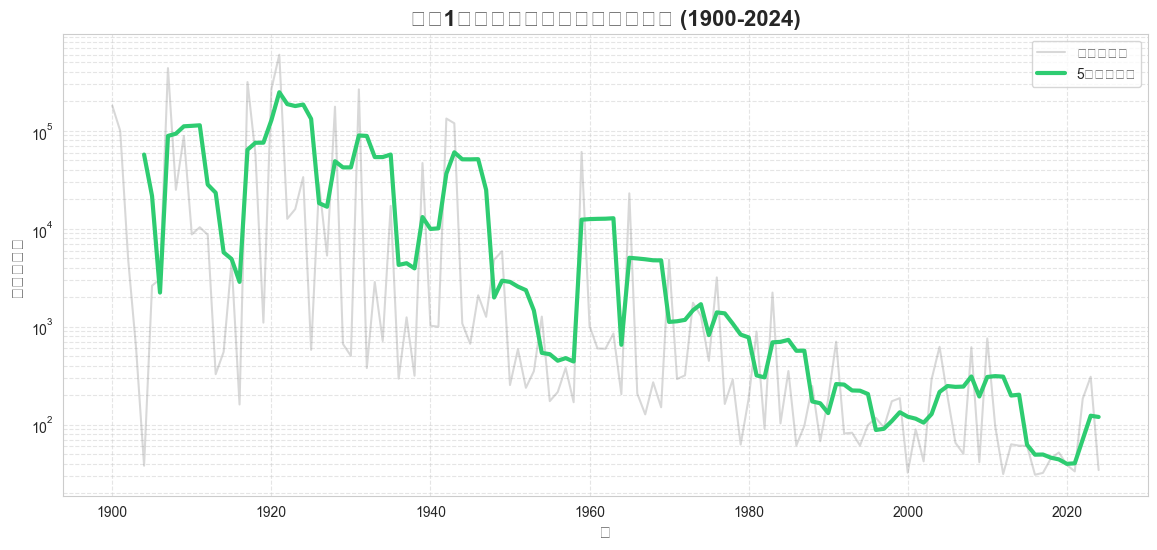

In [5]:
# 死者数の欠損を0埋め
df['Total Deaths'] = df['Total Deaths'].fillna(0)

# 年ごとの集計
yearly_stats = df.groupby('Start Year').agg({'Total Deaths': 'sum', 'Disaster Subgroup': 'count'})
yearly_stats.columns = ['Total Deaths', 'Count']
yearly_stats['Deaths per Disaster'] = yearly_stats['Total Deaths'] / yearly_stats['Count']

# 移動平均でトレンドを見やすくする（5年移動平均）
yearly_stats['MA_Deaths_per_Disaster'] = yearly_stats['Deaths per Disaster'].rolling(window=5).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(x=yearly_stats.index, y=yearly_stats['Deaths per Disaster'], label='単年データ', alpha=0.3, color='gray')
sns.lineplot(x=yearly_stats.index, y=yearly_stats['MA_Deaths_per_Disaster'], label='5年移動平均', linewidth=3, color='#2ecc71')

plt.title('災害1件あたりの平均死者数の推移 (1900-2024)', fontsize=16, fontweight='bold')
plt.xlabel('年', fontsize=12)
plt.ylabel('平均死者数', fontsize=12)
plt.yscale('log') # 対数軸にして変化を見やすく
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

### 🛡️ 希望の光
グラフ（緑色の線：5年移動平均）を見てください。**右肩下がりの傾向**が見て取れます。
（※対数軸を使用しているため、下に行くほど指数関数的に減少していることを意味します）

これは何を意味するのでしょうか？
災害の発生件数自体は増えていますが、**「1回の災害で亡くなる人の数」は確実に減っている**のです。

- 早期警戒システムの整備
- インフラの強化
- 医療体制の充実

人類の努力は、確実に命を救っています。

## エピローグ：未来へ向けて

データ分析の旅を終えて、私たちは2つの相反する事実を知りました。

1.  **災害の頻度は増している（脅威の増大）**
2.  **しかし、私たちは死ななくなっている（適応力の向上）**

これは、私たちが自然の猛威に対して決して無力ではないことの証明です。
特にアジアという災害多発地域に住む私たちにとって、過去のデータから学び、備えることは、未来の命を守ることに直結します。

データは単なる数字の羅列ではありません。それは、過去の人々が残してくれた「生き延びるためのメッセージ」なのです。